In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
from collections import Counter

In [4]:
# Define dataset paths
image_dir = "../data/brain-tumor/train/images"
label_dir = "../data/brain-tumor/train/labels"

# Get image and label filenames
image_files = sorted(os.listdir(image_dir))
label_files = sorted(os.listdir(label_dir))

# Print dataset size
print(f"Total Images: {len(image_files)}")
print(f"Total Labels: {len(label_files)}")

Total Images: 893
Total Labels: 878


In [7]:
# Function to extract class labels
def extract_labels(label_dir):
    labels = []
    
    for label_file in sorted(os.listdir(label_dir)):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, "r") as f:
            first_line = f.readline().strip()  # Read the first line
            class_label = int(first_line.split()[0])  # Extract the first byte (0 or 1)
            labels.append(class_label)
    
    return labels

# Extract labels from dataset
train_labels = extract_labels(label_dir)

# Print sample
print("Sample labels:", train_labels[:10])

Sample labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


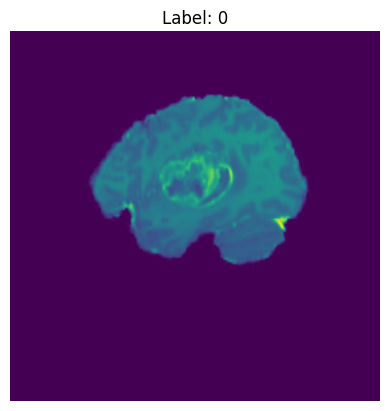

In [13]:
# Read a sample image and its corresponding label
sample_image = os.path.join(image_dir, image_files[42])
sample_label = train_labels[42]

# Open image
image = Image.open(sample_image)


# Display image with label
plt.imshow(image)
plt.title(f"Label: {sample_label}")
plt.axis("off")
plt.show()

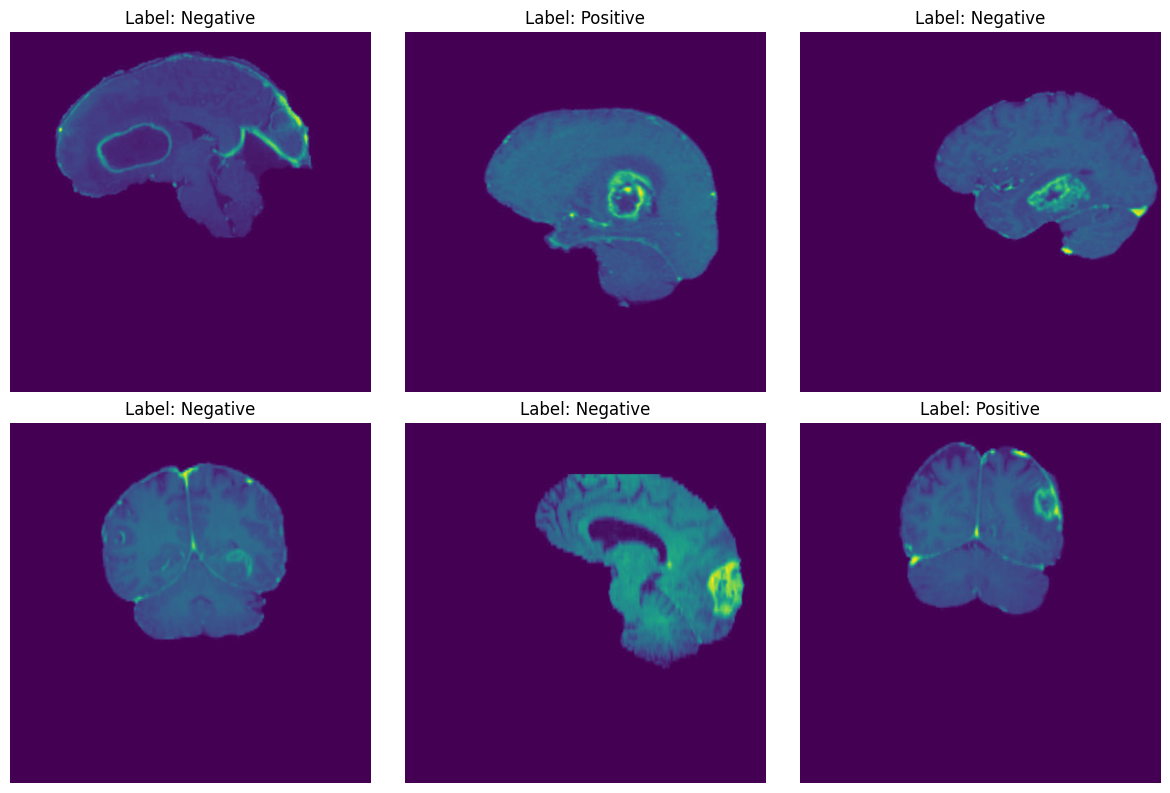

In [14]:
import random
from PIL import Image

# Function to display random samples with labels
def plot_sample_images(image_dir, label_dir, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
    axes = axes.flatten()

    sample_indices = random.sample(range(len(image_files)), num_samples)

    for i, idx in enumerate(sample_indices):
        img_path = os.path.join(image_dir, image_files[idx])
        label_path = os.path.join(label_dir, label_files[idx])

        # Open image
        img = Image.open(img_path)

        # Extract label
        with open(label_path, "r") as f:
            label = int(f.readline().strip().split()[0])

        # Plot
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {'Positive' if label == 1 else 'Negative'}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Run function
plot_sample_images(image_dir, label_dir)

In [16]:
import os
from collections import Counter



# Path to training labels
train_label_dir = "../data/brain-tumor/train/labels"  # Update this path

# Function to count positive and negative labels
def count_labels(label_dir):
    label_counts = Counter()
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, "r") as f:
            first_line = f.readline().strip()  # Read the first line
            class_label = int(first_line.split()[0])  # Extract the first byte (0 or 1)
            label_counts[class_label] += 1  # Update counter
    
    return label_counts

# Count labels in the training set
train_label_counts = count_labels(train_label_dir)

# Print results
print("Training Dataset Distribution:")
print(f"🔹 Negative (0): {train_label_counts[0]}")
print(f"🔹 Positive (1): {train_label_counts[1]}")

Training Dataset Distribution:
🔹 Negative (0): 419
🔹 Positive (1): 459


In [18]:
import os

# Path to validation annotation files
val_labels_path = "../data/brain-tumor/valid/labels"

# Count classes
negative_count = 0
positive_count = 0

# Iterate through all annotation files
for label_file in os.listdir(val_labels_path):
    with open(os.path.join(val_labels_path, label_file), 'r') as file:
        first_line = file.readline().strip()  # Read the first line
        class_label = int(first_line.split()[0])  # Extract the first value (class)
        if class_label == 0:
            negative_count += 1
        else:
            positive_count += 1

print(f"🔹 Negative (0): {negative_count}")
print(f"🔹 Positive (1): {positive_count}")

🔹 Negative (0): 142
🔹 Positive (1): 81


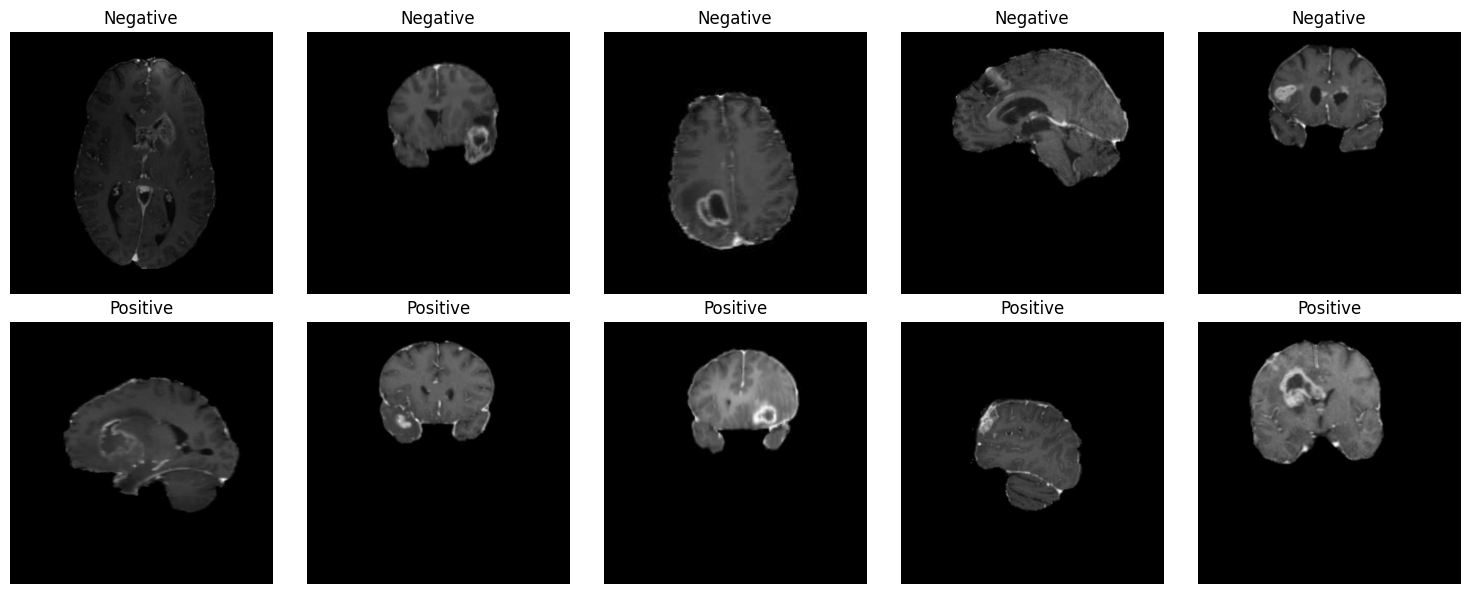

In [23]:
import matplotlib.pyplot as plt
import cv2
import random

# Paths to validation images and labels
val_images_path = "../data/brain-tumor/valid/images"
val_labels_path = "../data/brain-tumor/valid/labels"

# Function to load images of a given class
def load_sample_images(class_label, num_samples=5):
    sample_images = []
    
    for label_file in os.listdir(val_labels_path):
        with open(os.path.join(val_labels_path, label_file), 'r') as file:
            first_line = file.readline().strip()
            label = int(first_line.split()[0])
            if label == class_label:
                image_filename = label_file.replace(".txt", ".jpg")  # Assuming images are .jpg
                image_path = os.path.join(val_images_path, image_filename)
                if os.path.exists(image_path):
                    sample_images.append(image_path)

    return random.sample(sample_images, min(len(sample_images), num_samples))

# Load images
neg_samples = load_sample_images(0)  # Negative samples
pos_samples = load_sample_images(1)  # Positive samples

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img_path in enumerate(neg_samples + pos_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis("off")
    label = "Negative" if i < 5 else "Positive"
    axes[i // 5, i % 5].set_title(label)

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

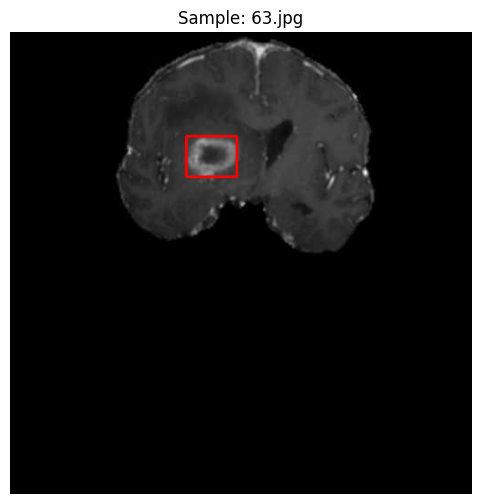

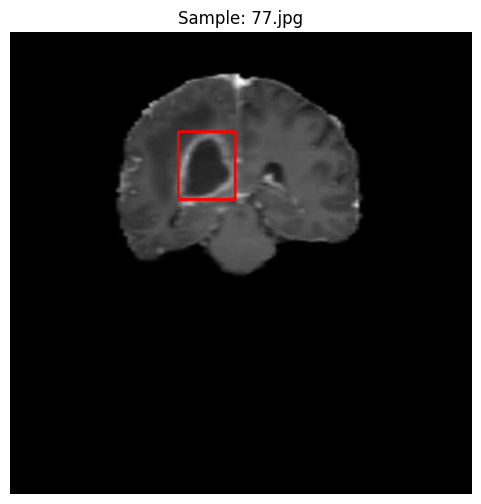

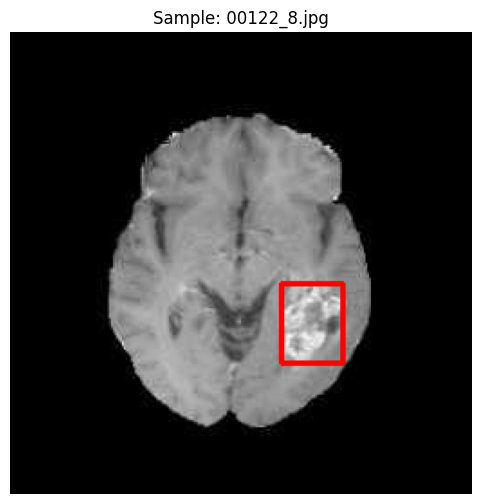

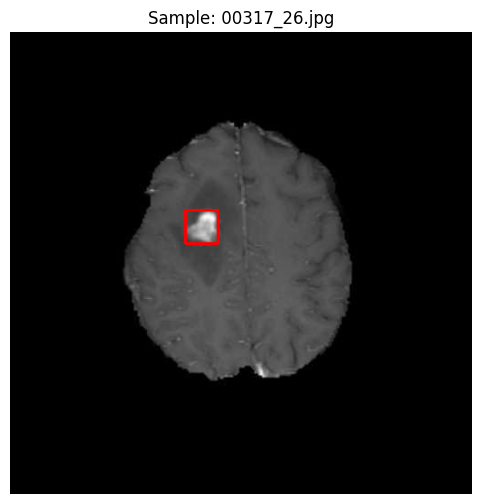

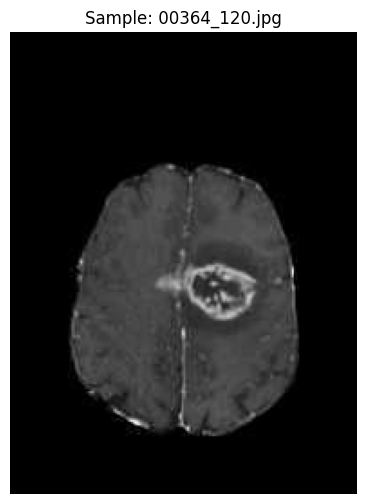

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
image_dir = "../data/brain-tumor/train/images"
label_dir = "../data/brain-tumor/train/labels"

# Function to convert YOLO format to pixel values
def yolo_to_bbox(yolo_label, img_width, img_height):
    class_id, x_center, y_center, width, height = map(float, yolo_label.split())
    x_center, y_center, width, height = (
        x_center * img_width,
        y_center * img_height,
        width * img_width,
        height * img_height,
    )
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)
    return class_id, x1, y1, x2, y2

# Get a few sample images
sample_images = os.listdir(image_dir)[:5]

for img_file in sample_images:
    # Load image
    img_path = os.path.join(image_dir, img_file)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = image.shape

    # Load corresponding label
    label_file = img_file.replace(".jpg", ".txt")  # Assuming images are .jpg
    label_path = os.path.join(label_dir, label_file)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id, x1, y1, x2, y2 = yolo_to_bbox(line, img_width, img_height)
                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Sample: {img_file}")
    plt.axis("off")
    plt.show()

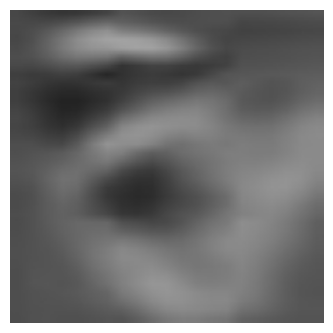

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Define paths
image_dir = "../data/brain-tumor/valid/images"
label_dir = "../data/brain-tumor/valid/labels"

# Get all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Define function to draw bounding boxes
def draw_boxes(image_path, label_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    h, w, _ = image.shape  # Get image dimensions

    # Read label file
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            values = line.strip().split()
            class_id = values[0]  # Class label
            x_center, y_center, width, height = map(float, values[1:])

            # Convert to pixel coordinates
            x_center, y_center, width, height = (
                x_center * w,
                y_center * h,
                width * w,
                height * h,
            )

            # Calculate bounding box coordinates
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Put class label
            label_text = f"Class: {class_id}"
            cv2.putText(image, label_text, (x_min, y_min - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return image

# Display all images with bounding boxes
plt.figure(figsize=(10, 10))
for idx, img_file in enumerate(image_files[23:24]):  # Display up to 9 images
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))

    img_with_boxes = draw_boxes(img_path, label_path)

    plt.subplot(3, 3, idx + 1)
    plt.imshow(img_with_boxes)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Define image directory
image_dir = "../data/brain-tumor/train/images"
output_dir = "../data/brain-tumor/train/colorized_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

def enhance_and_colorize(image_path, save_path):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) and colorize."""
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if gray_image is None:
        print(f"Skipping {image_path}, unable to load image.")
        return

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_image)

    # Convert to color
    color_image = cv2.applyColorMap(enhanced_img, cv2.COLORMAP_JET)

    # Save output image
    cv2.imwrite(save_path, color_image)

    return color_image

# Process all images in directory
for image_file in os.listdir(image_dir):
    if image_file.endswith((".jpg", ".png")):
        image_path = os.path.join(image_dir, image_file)
        save_path = os.path.join(output_dir, image_file)
        
        enhance_and_colorize(image_path, save_path)

print("Colorized images saved to:", output_dir)

Colorized images saved to: ../data/brain-tumor/train/colorized_images


In [7]:
import os
import cv2

# Paths
image_dir = "../data/brain-tumor/train/colorized_images"
label_dir = "../data/brain-tumor/train/labels"
output_crop_dir = "../data/brain-tumor/train/cropimages"

# Create output directory if not exists
os.makedirs(output_crop_dir, exist_ok=True)

# Process all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping {image_file}, unable to load image.")
            continue
        h, w, _ = image.shape

        # Read bounding box from YOLO label file
        with open(label_path, "r") as f:
            lines = f.readlines()

        for i, line in enumerate(lines):
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # Skip malformed line
            class_id, x_center, y_center, box_width, box_height = map(float, parts)

            # Convert YOLO format to pixel coordinates
            x_center *= w
            y_center *= h
            box_width *= w
            box_height *= h

            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)

            # Ensure bounding box is within image bounds
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(w, x2)
            y2 = min(h, y2)

            # Crop the image
            cropped_img = image[y1:y2, x1:x2]

            # Save the cropped image
            crop_filename = f"{os.path.splitext(image_file)[0]}_crop_{i}.jpg"
            crop_save_path = os.path.join(output_crop_dir, crop_filename)
            cv2.imwrite(crop_save_path, cropped_img)

print("✅ Cropped tumor images saved to:", output_crop_dir)

✅ Cropped tumor images saved to: ../data/brain-tumor/train/cropimages


In [9]:
import os
import cv2

# Paths
image_dir = "../data/brain-tumor/valid/colorized_images"
label_dir = "../data/brain-tumor/valid/labels"
output_crop_dir = "../data/brain-tumor/valid/cropimages"

# Create output directory if not exists
os.makedirs(output_crop_dir, exist_ok=True)

# Process all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"⚠️ Skipping {image_file}, unable to load image.")
            continue
        h, w, _ = image.shape

        # Read YOLO label
        with open(label_path, "r") as f:
            lines = f.readlines()

        if not lines:
            print(f"⚠️ Skipping {image_file}, label file is empty.")
            continue

        # Just use the first bounding box (assuming only one tumor per image)
        parts = lines[0].strip().split()
        if len(parts) != 5:
            print(f"⚠️ Malformed label in {label_file}, skipping.")
            continue

        class_id, x_center, y_center, box_width, box_height = map(float, parts)

        # Convert YOLO format to pixel coordinates
        x_center *= w
        y_center *= h
        box_width *= w
        box_height *= h

        x1 = int(x_center - box_width / 2)
        y1 = int(y_center - box_height / 2)
        x2 = int(x_center + box_width / 2)
        y2 = int(y_center + box_height / 2)

        # Ensure bounding box is within image bounds
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(w, x2)
        y2 = min(h, y2)

        # Crop and save
        cropped_img = image[y1:y2, x1:x2]
        crop_save_path = os.path.join(output_crop_dir, image_file)  # save with same name
        cv2.imwrite(crop_save_path, cropped_img)

print("✅ Cropped tumor images saved to:", output_crop_dir)

✅ Cropped tumor images saved to: ../data/brain-tumor/valid/cropimages


In [11]:
import os
import cv2
import numpy as np

# Input and output directories
image_dir = "../data/brain-tumor/valid/colorized_images"
output_crop_dir = "../data/brain-tumor/valid/cropmainimages"

# Create output directory if it doesn't exist
os.makedirs(output_crop_dir, exist_ok=True)

# Define HSV range for blue (background) detection
lower_blue = np.array([100, 100, 0])
upper_blue = np.array([140, 255, 255])

# Process each image
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"❌ Skipping {filename}, unable to load.")
            continue

        # Convert to HSV and mask blue
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_non_blue = cv2.bitwise_not(mask_blue)

        # Find contours in non-blue region
        contours, _ = cv2.findContours(mask_non_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)

            # Crop and save
            cropped = image[y:y+h, x:x+w]
            save_path = os.path.join(output_crop_dir, filename)
            cv2.imwrite(save_path, cropped)
            print(f"✅ Saved: {filename}")
        else:
            print(f"⚠️ No non-blue region found in {filename}")

✅ Saved: val_1 (144).jpg
✅ Saved: val_1 (87).jpg
✅ Saved: val_1 (113).jpg
✅ Saved: val_1 (68).jpg
✅ Saved: val_1 (105).jpg
✅ Saved: val_1 (91).jpg
✅ Saved: val_1 (152).jpg
✅ Saved: val_1 (29).jpg
✅ Saved: val_1 (52).jpg
✅ Saved: val_1 (129).jpg
✅ Saved: val_1 (200).jpg
✅ Saved: val_1 (191).jpg
✅ Saved: val_1 (187).jpg
✅ Saved: val_1 (13).jpg
✅ Saved: val_1 (168).jpg
✅ Saved: val_1 (44).jpg
✅ Saved: val_1 (216).jpg
✅ Saved: val_1 (148).jpg
✅ Saved: val_1 (33).jpg
✅ Saved: val_1 (64).jpg
✅ Saved: val_1 (220).jpg
✅ Saved: val_1 (109).jpg
✅ Saved: val_1 (72).jpg
✅ Saved: val_1 (25).jpg
✅ Saved: val_1 (125).jpg
✅ Saved: val_1 (2).jpg
✅ Saved: val_1 (172).jpg
✅ Saved: val_1 (164).jpg
✅ Saved: val_1 (48).jpg
✅ Saved: val_1 (133).jpg
✅ Saved: val_1 (49).jpg
✅ Saved: val_1 (132).jpg
✅ Saved: val_1 (165).jpg
✅ Saved: val_1 (3).jpg
✅ Saved: val_1 (173).jpg
✅ Saved: val_1 (124).jpg
✅ Saved: val_1 (24).jpg
✅ Saved: val_1 (108).jpg
✅ Saved: val_1 (73).jpg
✅ Saved: val_1 (221).jpg
✅ Saved: val_1 (65)